In [1]:
from typing import Optional

from matplotlib import pyplot as plt
from torch import Tensor

from src.data.loader import get_dataloader
from src.utils import load_config

In [2]:
config = load_config()
config.batch_size = 1
dataloaders = [
    get_dataloader(config, subset="testing", snr_db=None, shuffle=False),
    get_dataloader(config, subset="testing", snr_db=20, shuffle=False),
    get_dataloader(config, subset="testing", snr_db=10, shuffle=False),
    get_dataloader(config, subset="testing", snr_db=0, shuffle=False),
]
dataset = dataloaders[0].dataset

In [3]:
def find_closest_index_for_label(_label: str) -> Optional[int]:
    for i in range(len(dataset)):
        if dataset.samples[i]["label"] == _label:
            return i
    return None


def visualize_waveforms(_label: str) -> None:
    index = find_closest_index_for_label(_label)

    if index is None:
        raise ValueError(f"Label {_label} not found in dataset.")

    for dl in dataloaders:
        waveform = dl.dataset[index][0].squeeze(0)
        plot_waveform(waveform, title=f"Class `{_label}` waveform with added SNR {dl.dataset.snr_db}")


def visualize_features(_label: str) -> None:
    index = find_closest_index_for_label(_label)

    if index is None:
        raise ValueError(f"Label {_label} not found in dataset.")

    for dl in dataloaders:
        feature = dl.dataset[index][1].squeeze(0)
        plot_feature(feature, title=f"Class `{_label}` Mel-Spectrogram with added SNR {dl.dataset.snr_db}")


def plot_waveform(waveform: Tensor, title: str) -> None:
    plt.figure(figsize=(10, 4))
    plt.plot(waveform.numpy())
    plt.title(title)
    plt.xlabel("Time (samples)")
    plt.ylabel("Amplitude")
    plt.show()


def plot_feature(feature: Tensor, title: str) -> None:
    plt.figure(figsize=(10, 4))
    plt.imshow(feature.log2().numpy(), aspect="auto", origin="lower", cmap="viridis")
    plt.title(title)
    plt.xlabel("Time (frames)")
    plt.ylabel("Mel Frequency Bins")
    plt.colorbar(format="%+2.0f dB")
    plt.show()

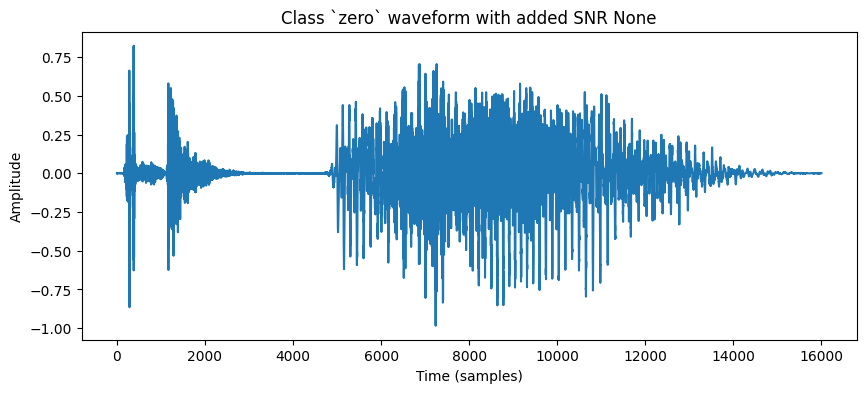

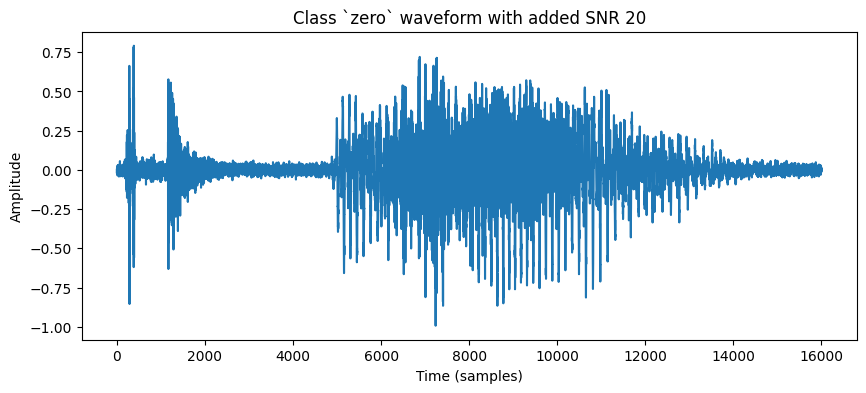

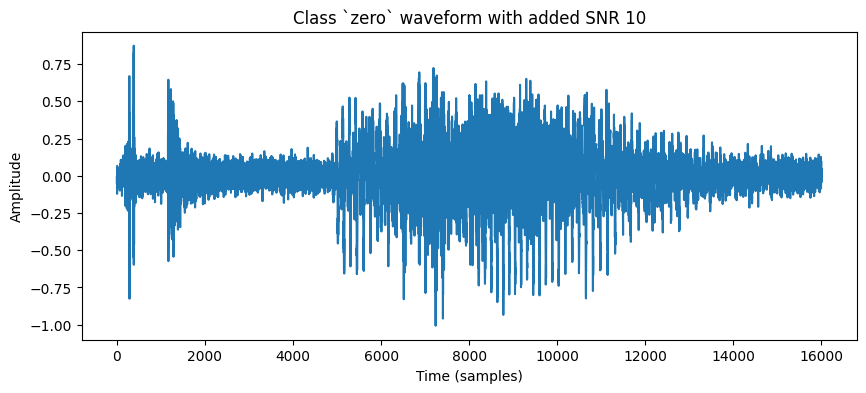

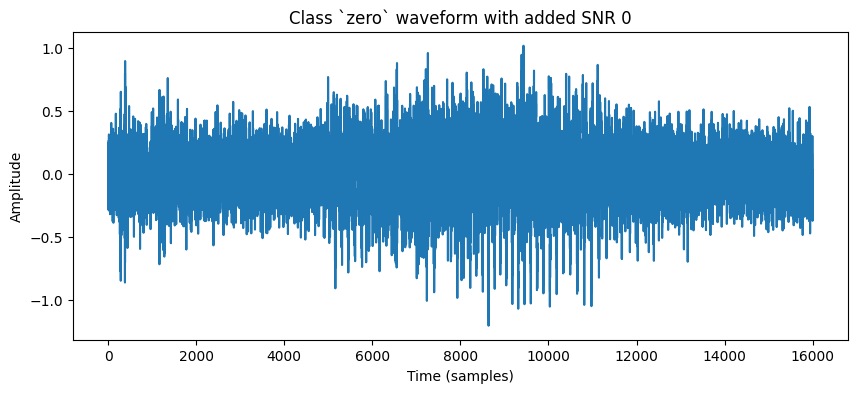

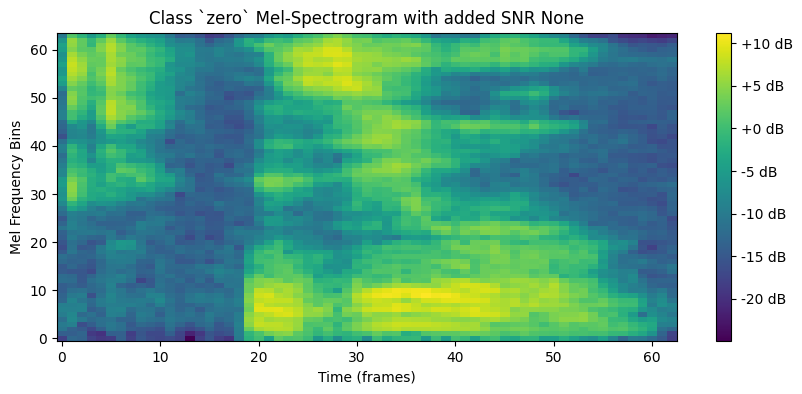

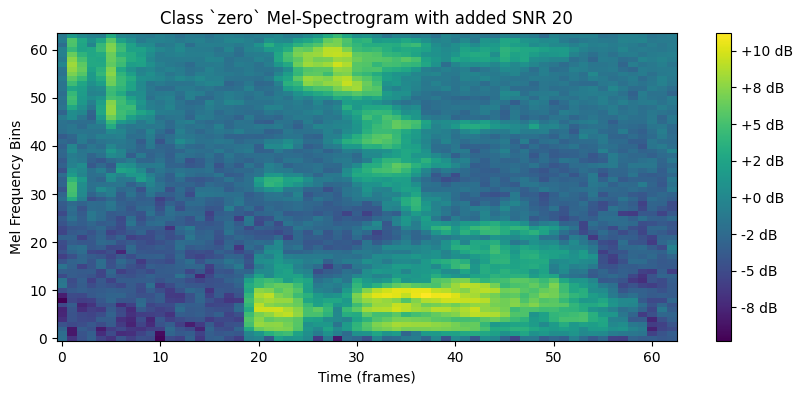

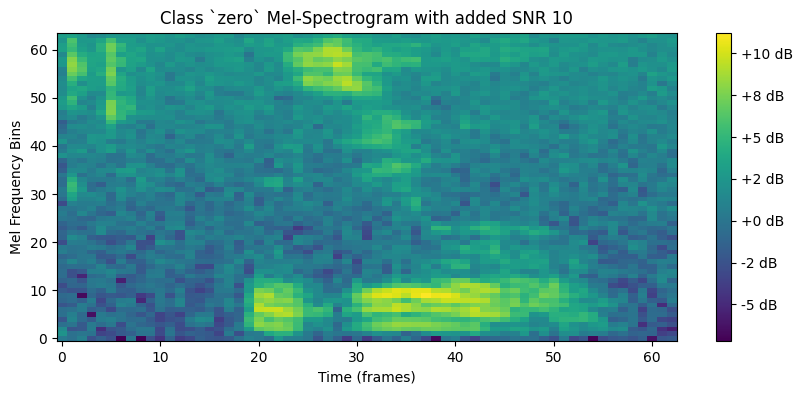

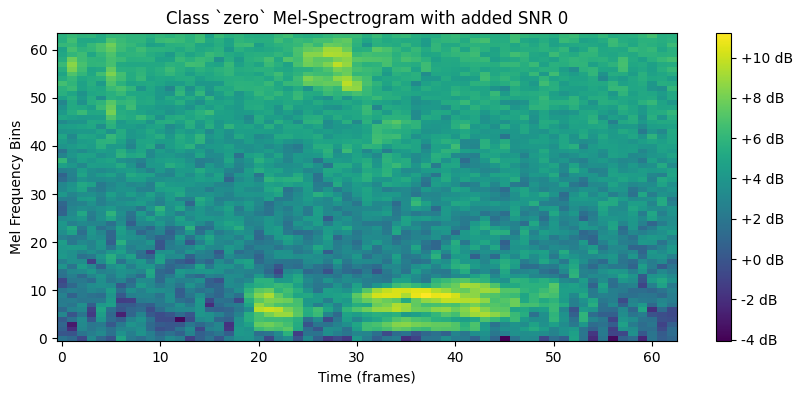

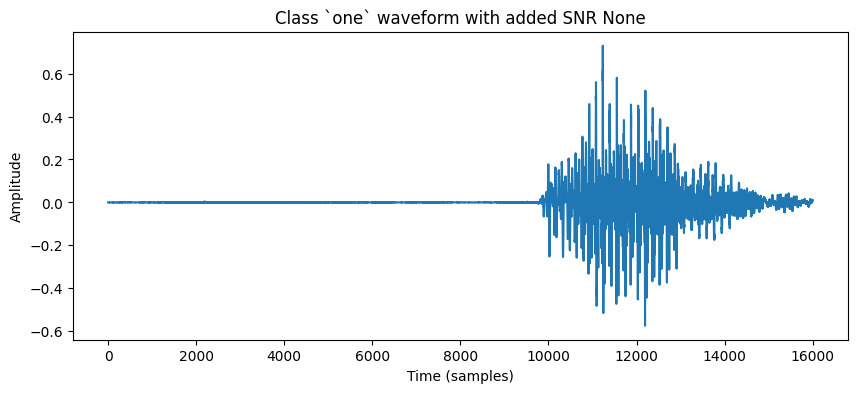

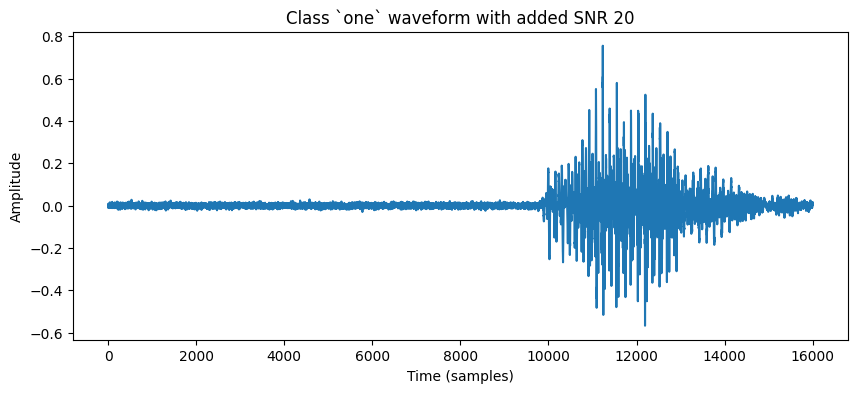

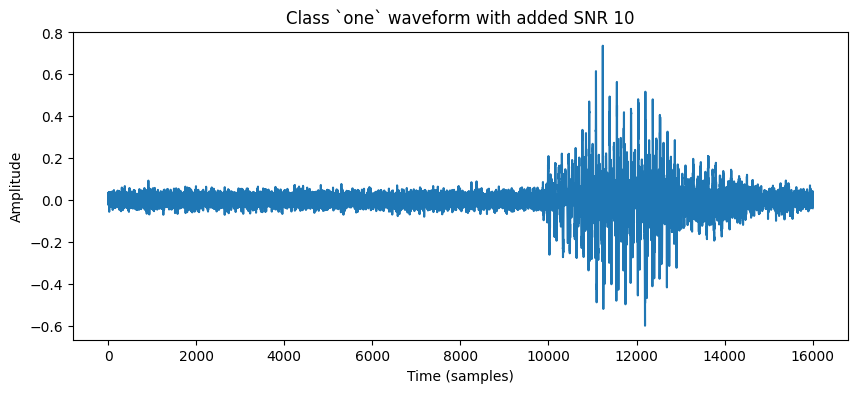

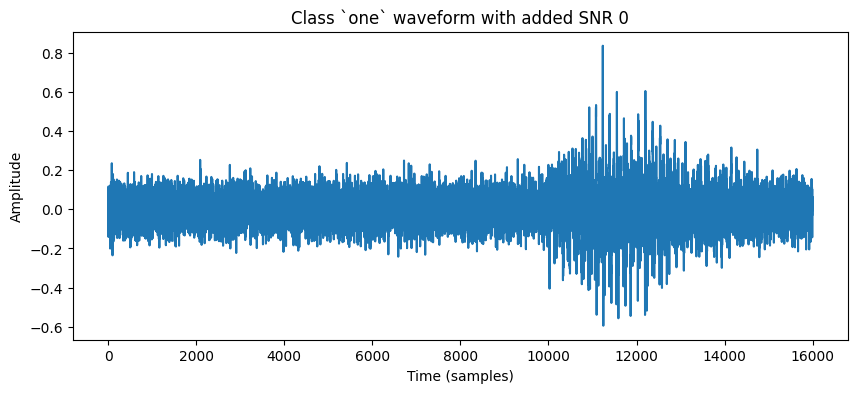

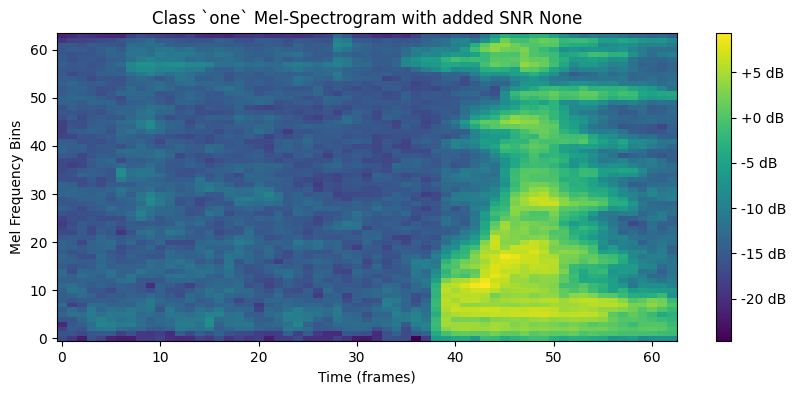

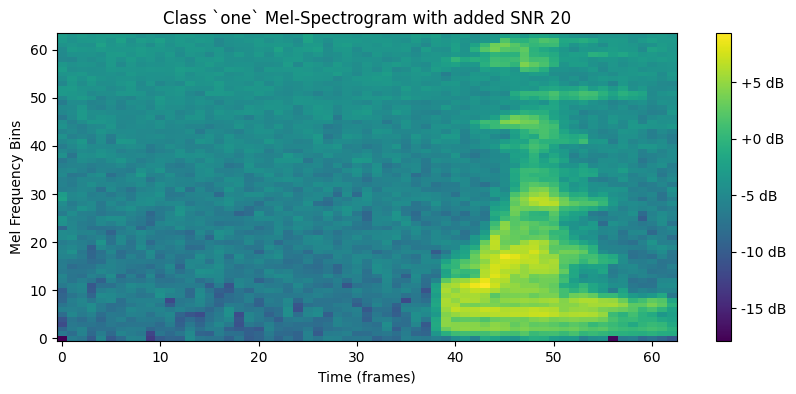

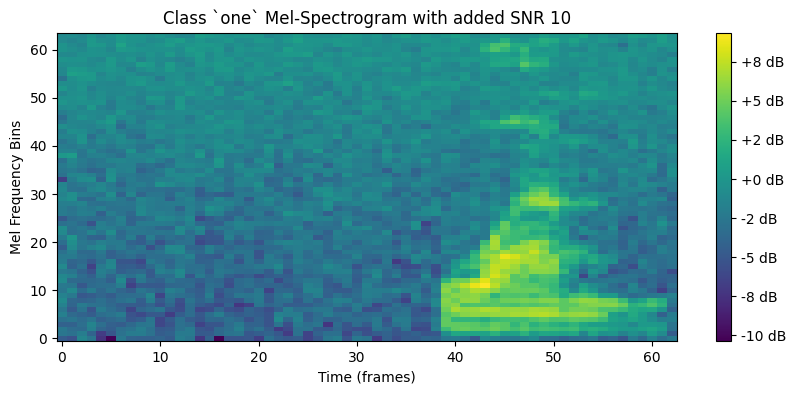

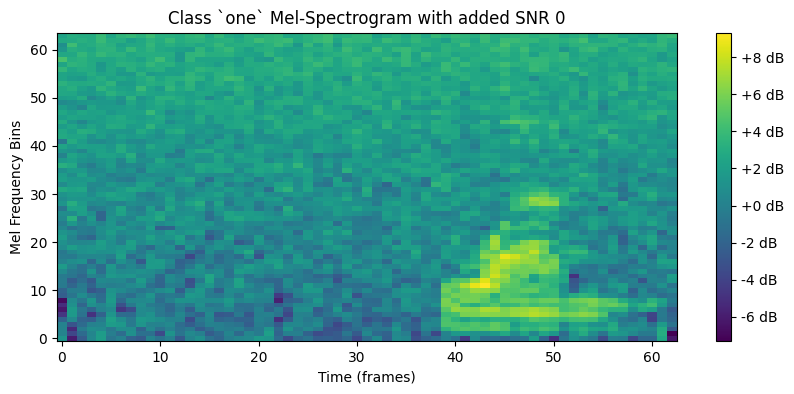

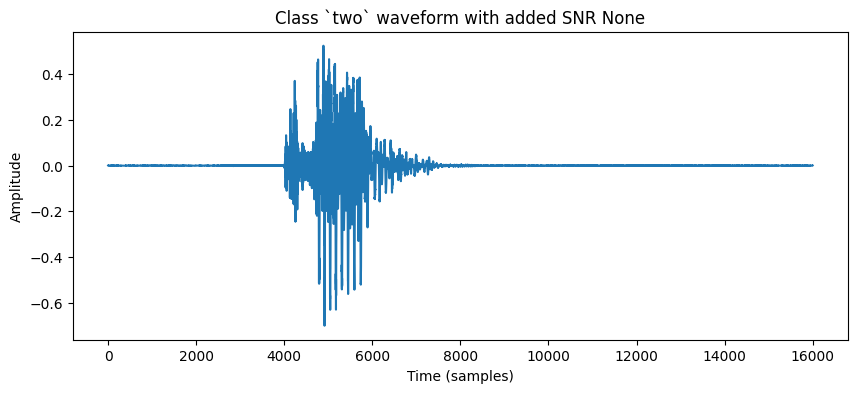

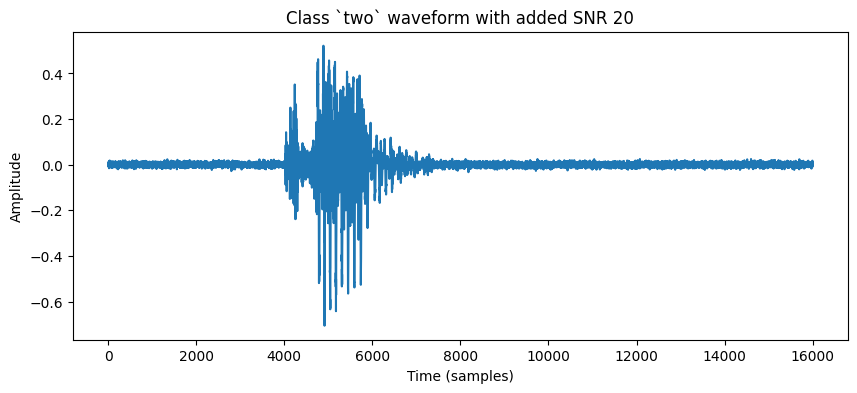

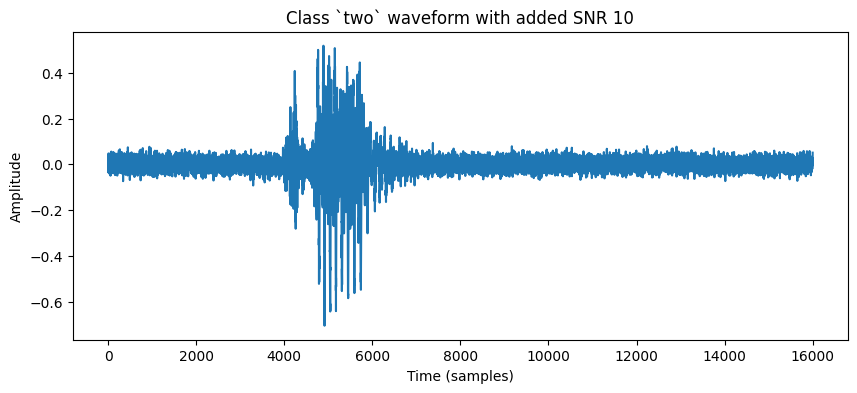

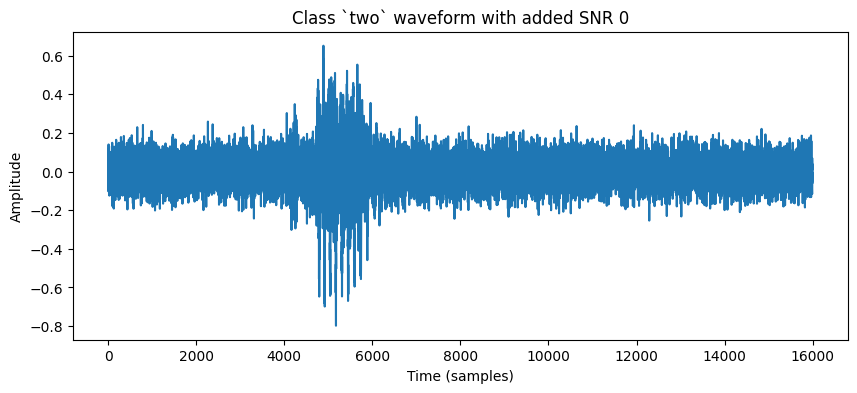

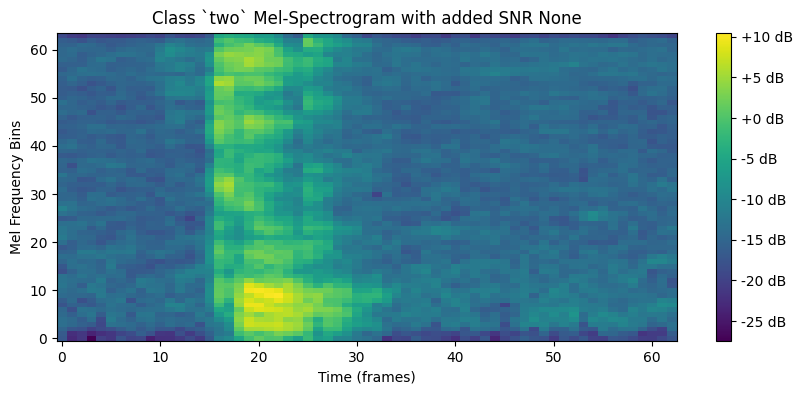

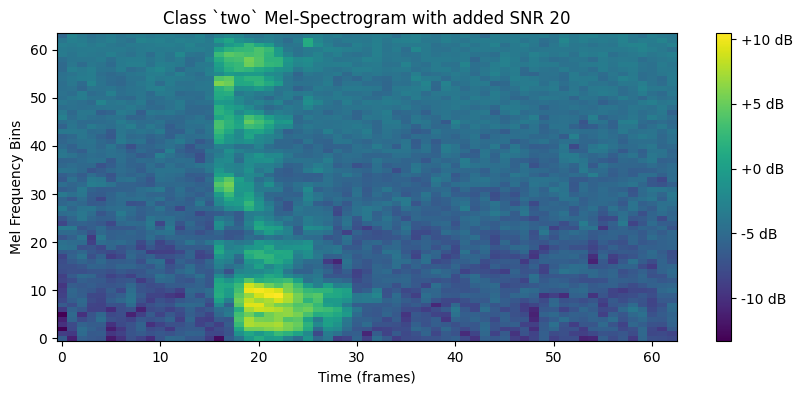

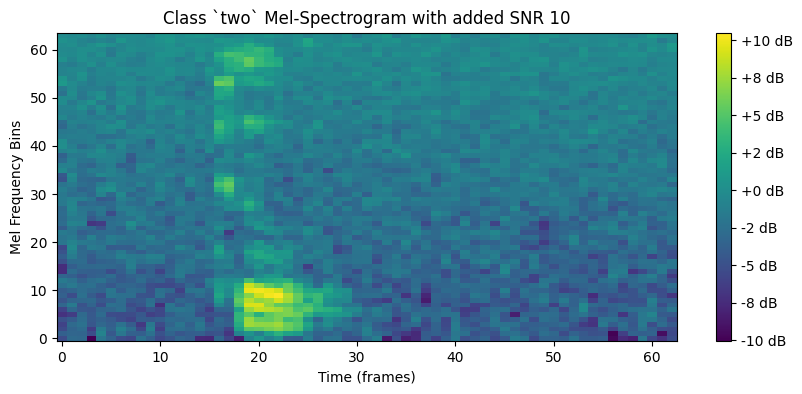

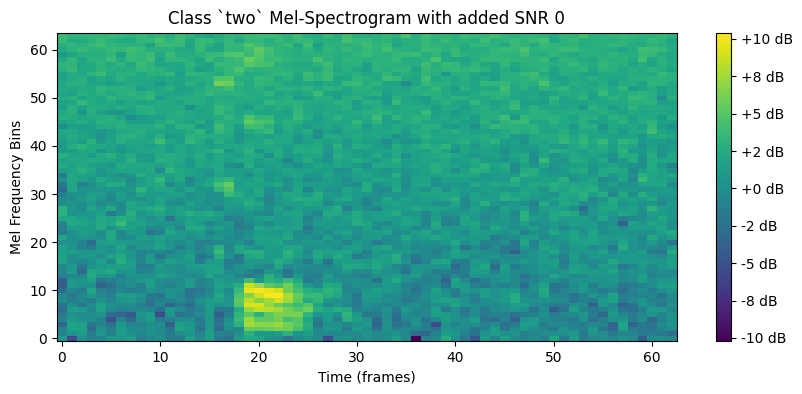

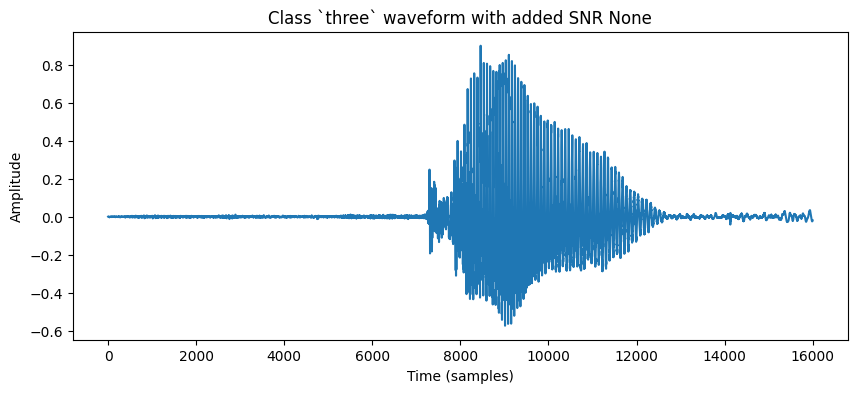

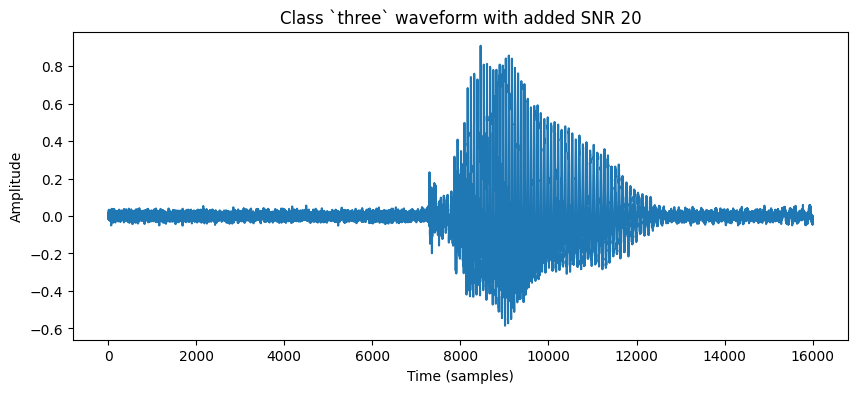

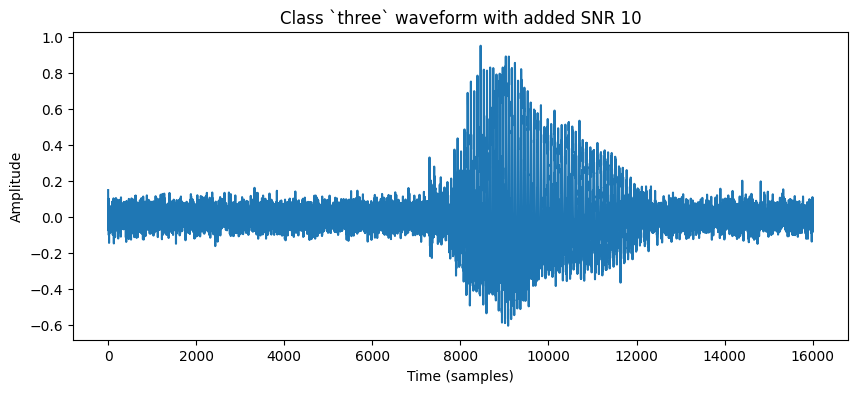

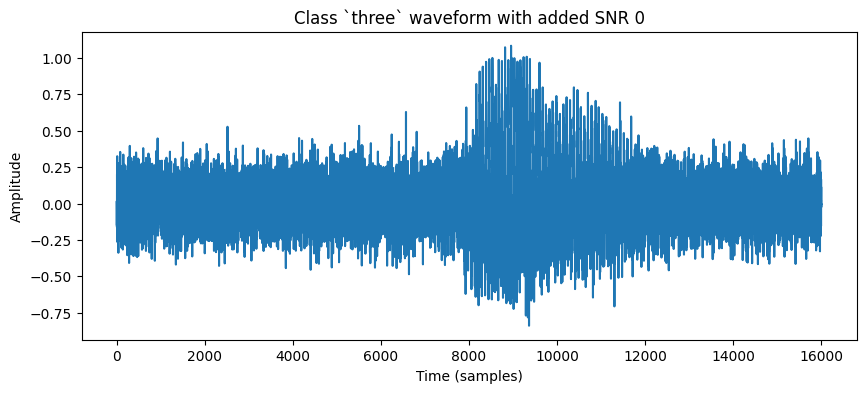

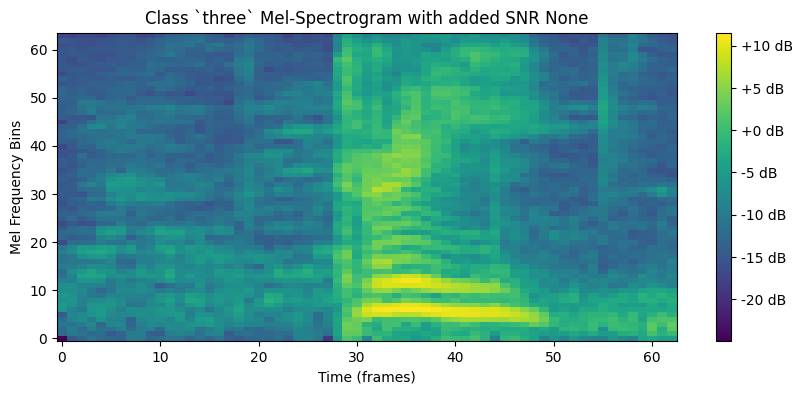

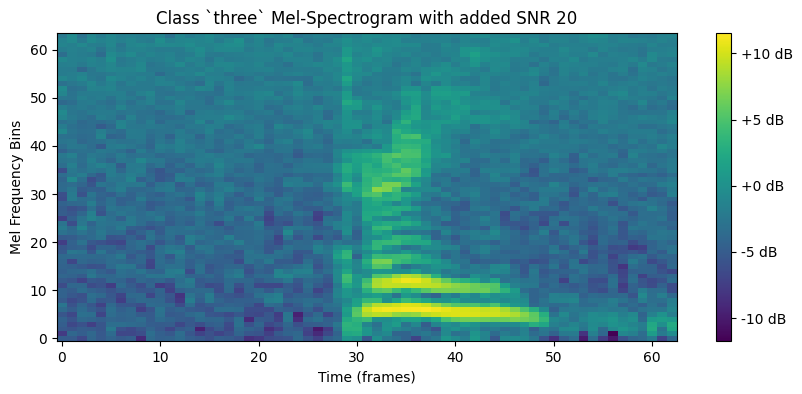

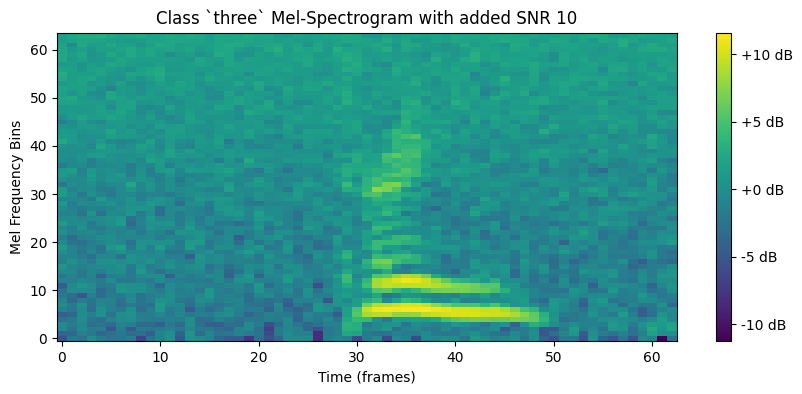

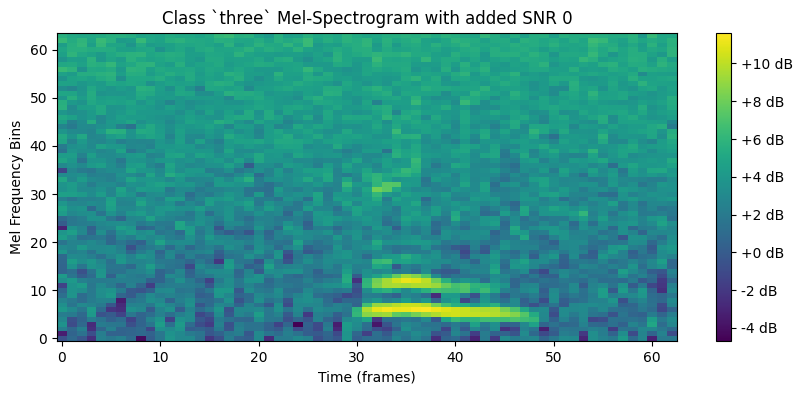

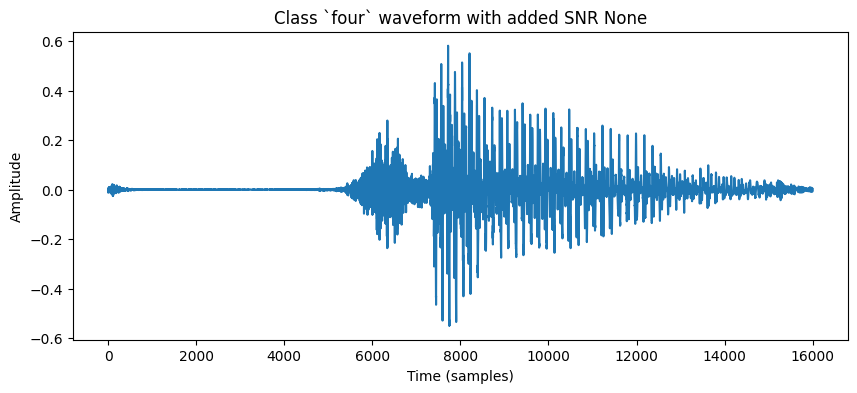

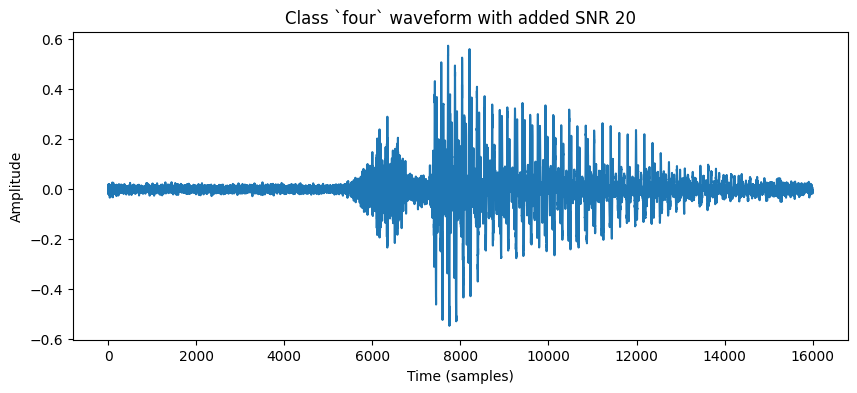

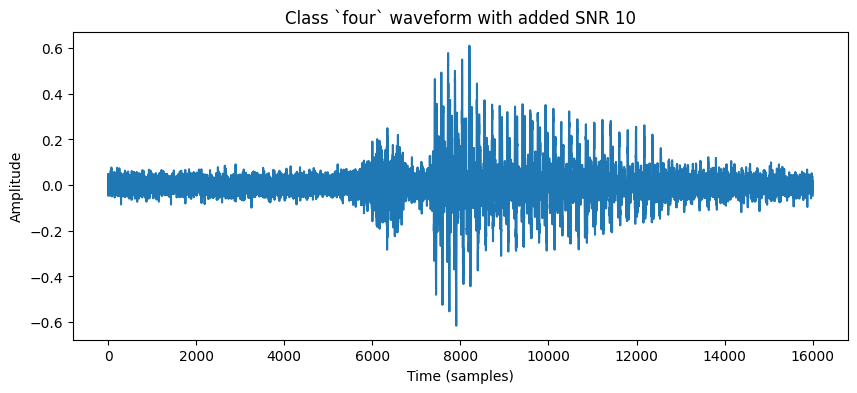

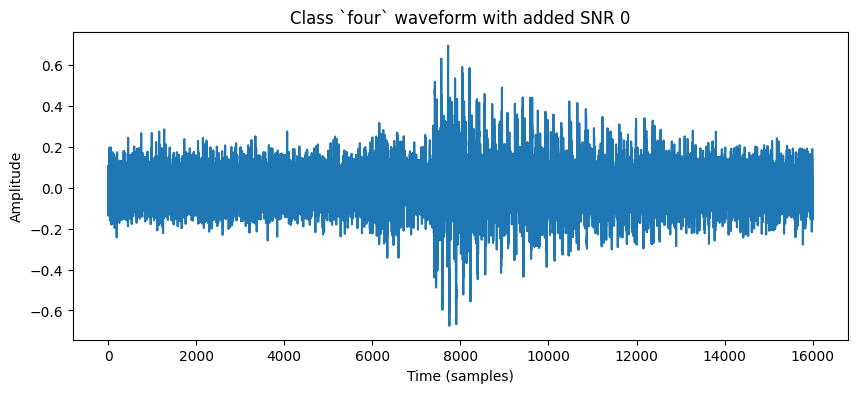

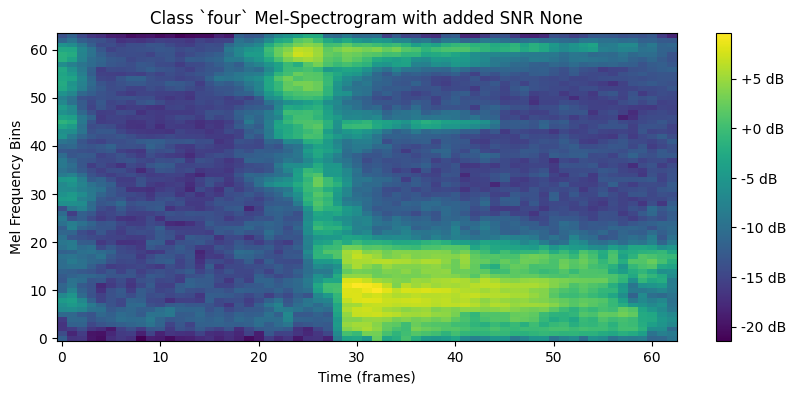

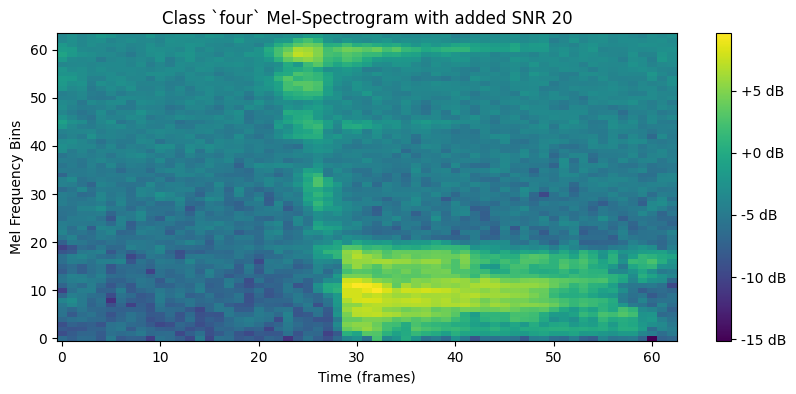

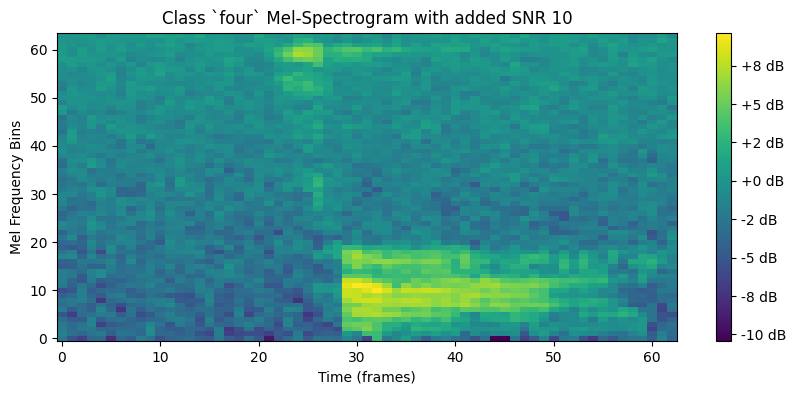

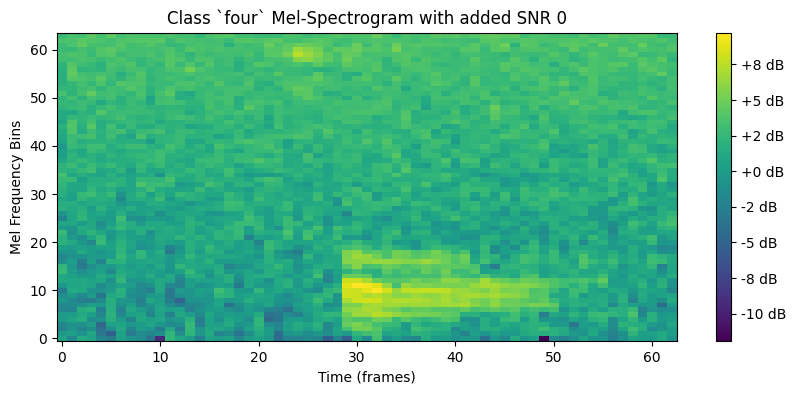

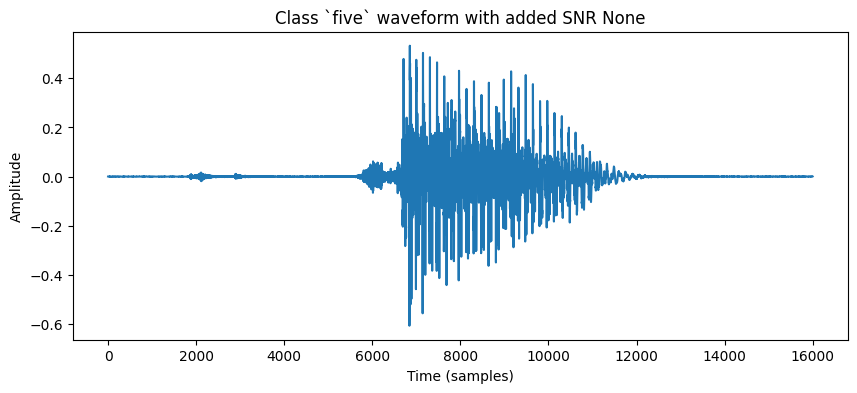

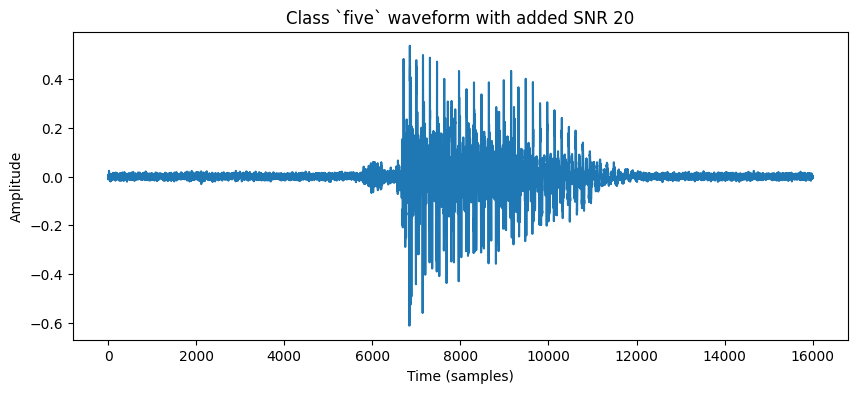

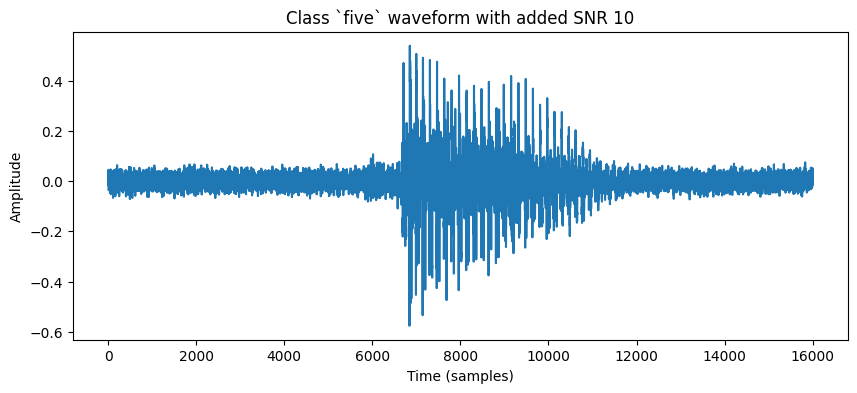

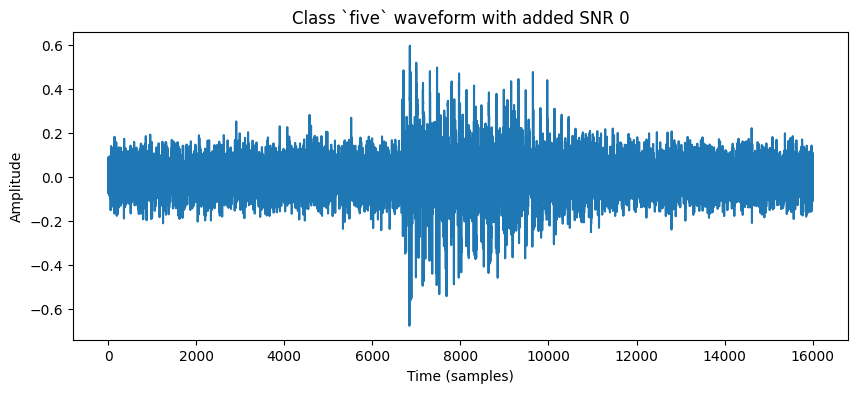

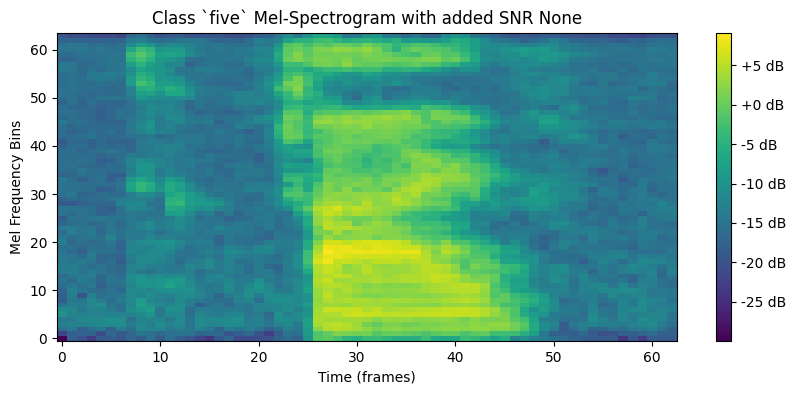

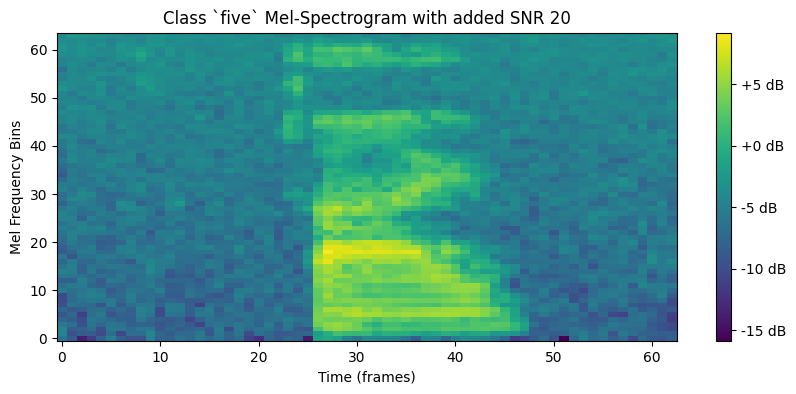

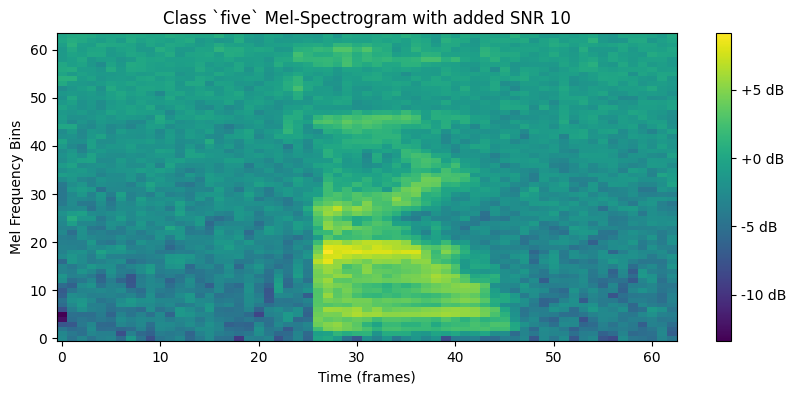

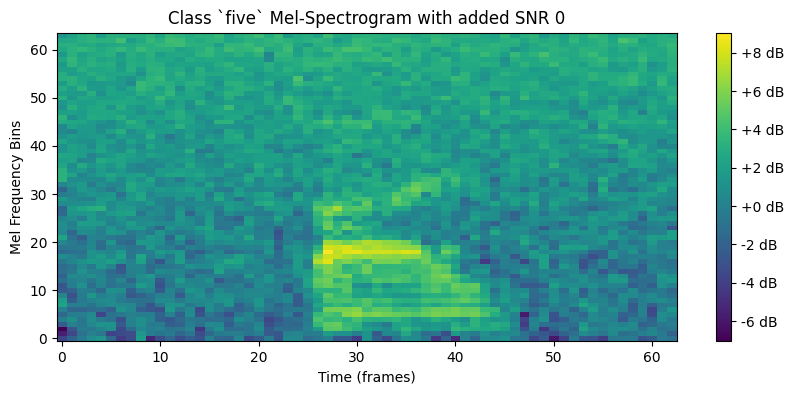

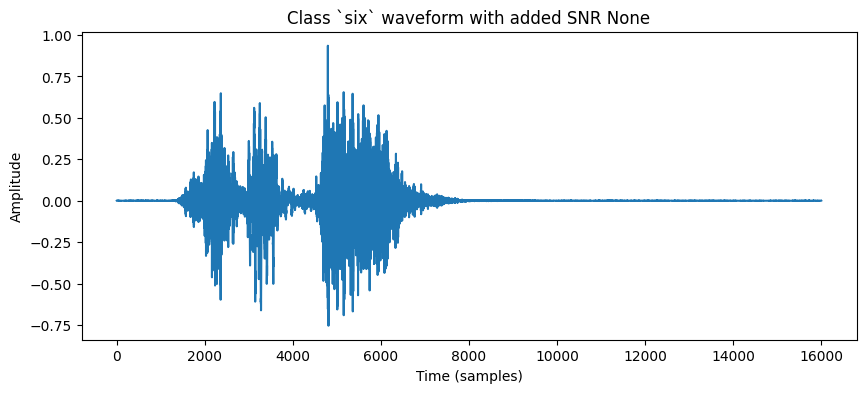

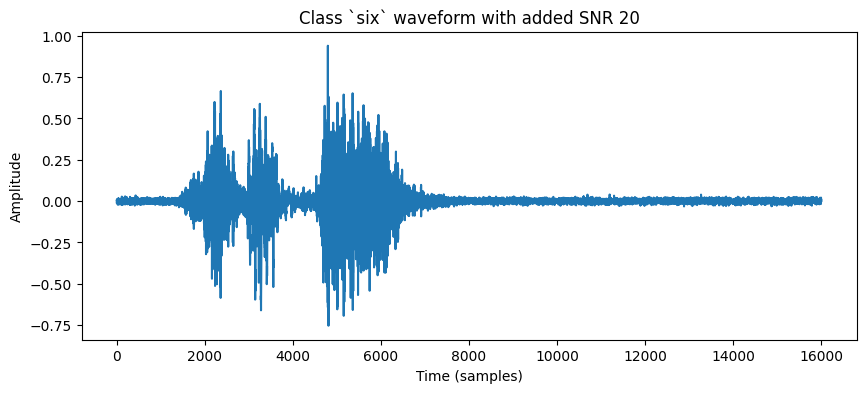

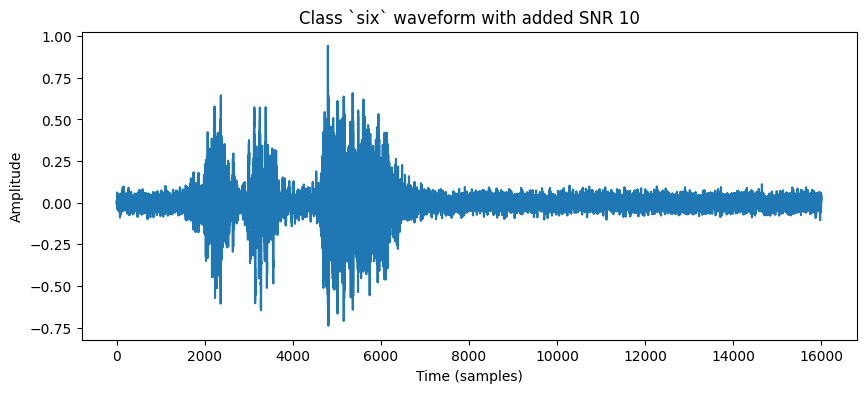

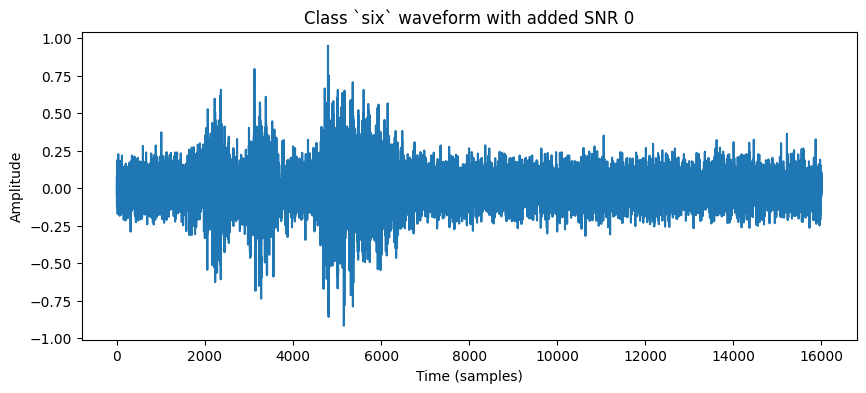

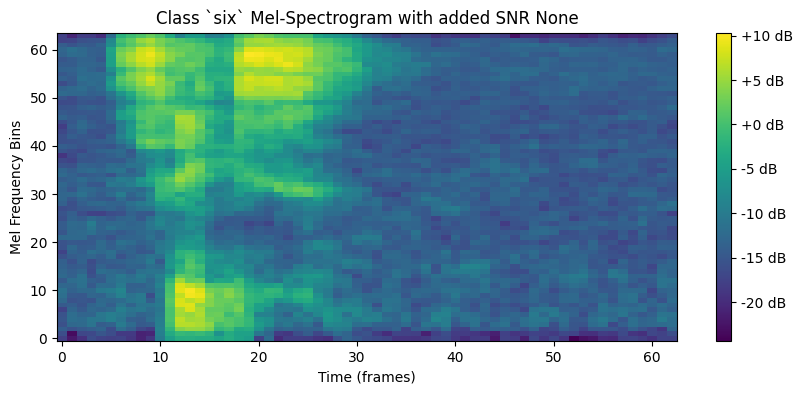

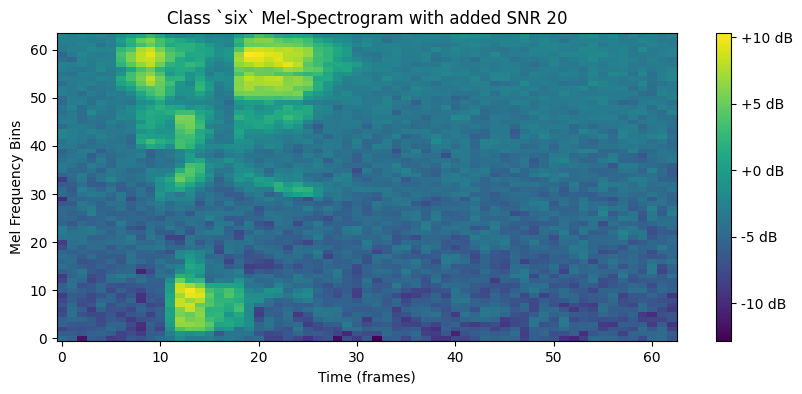

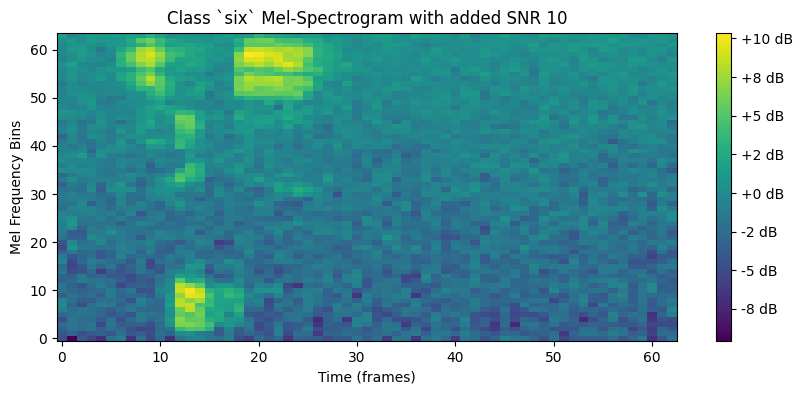

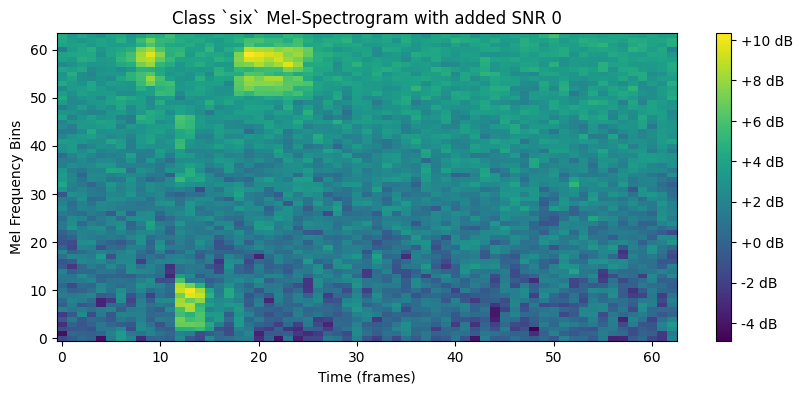

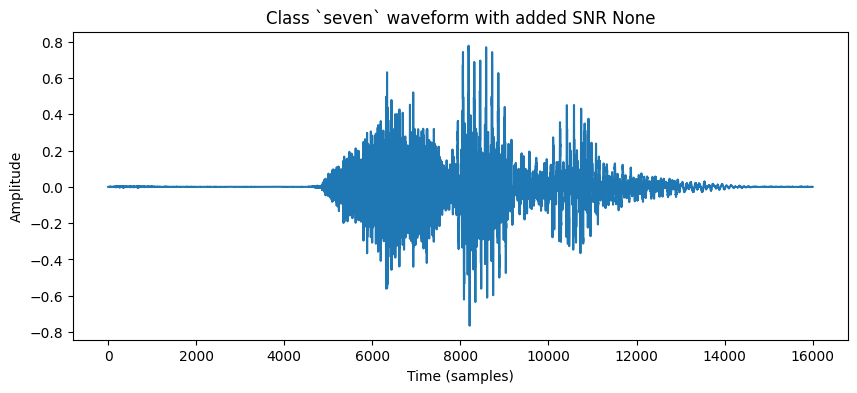

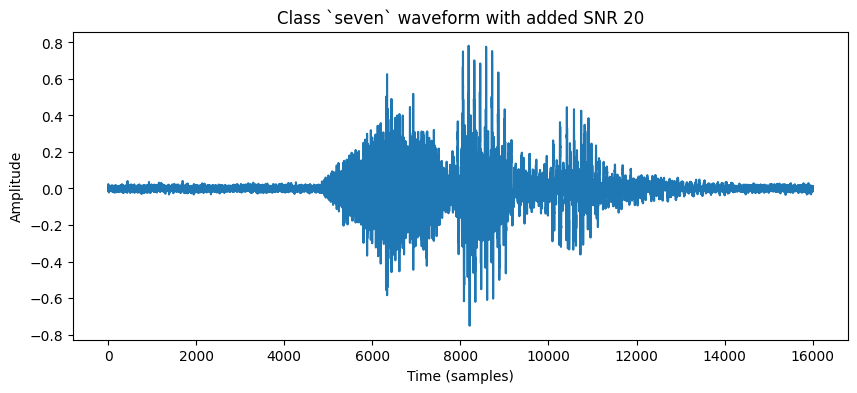

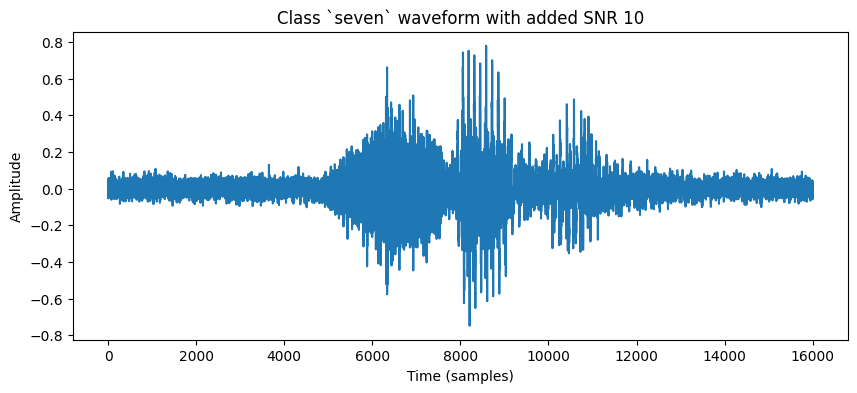

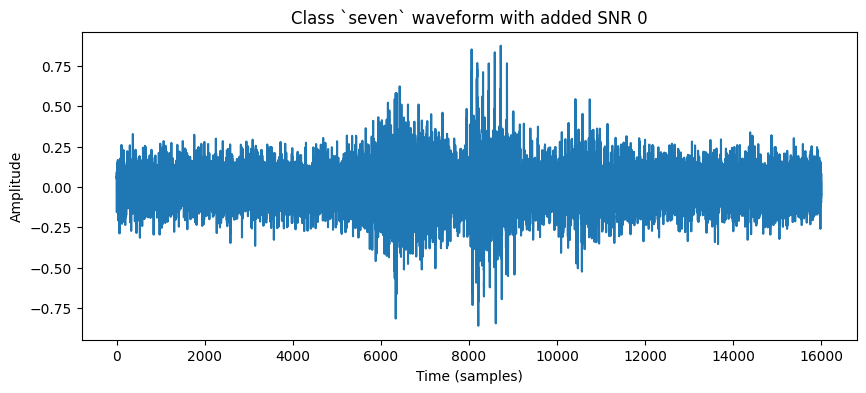

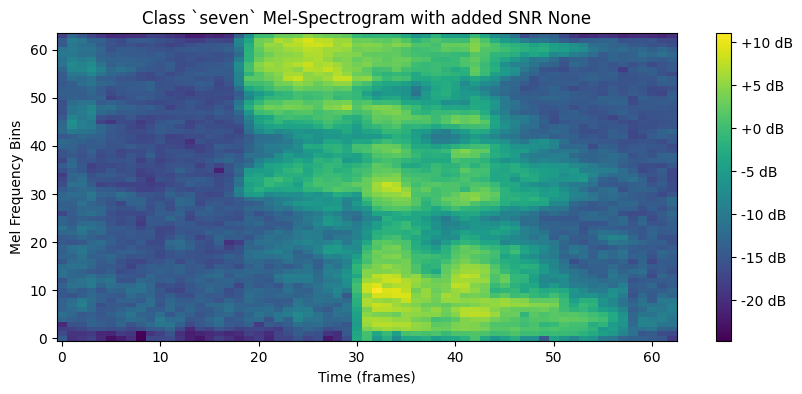

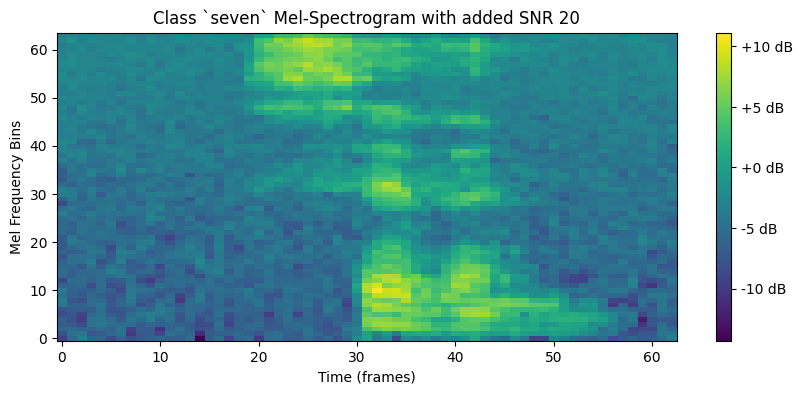

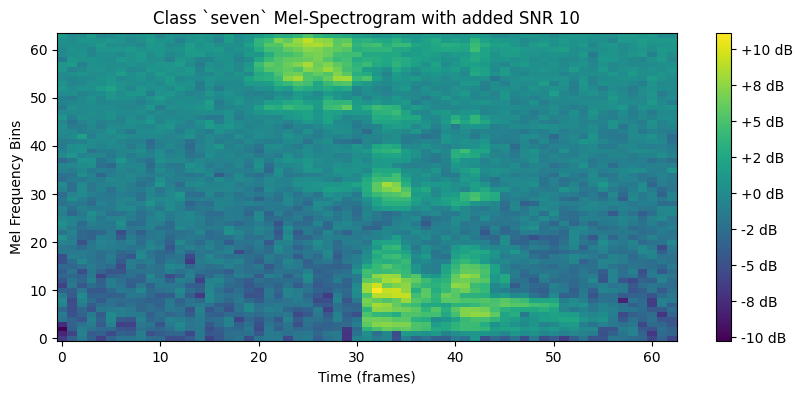

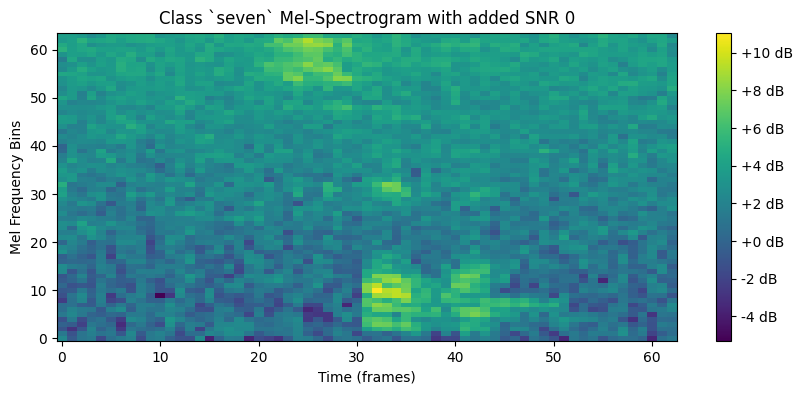

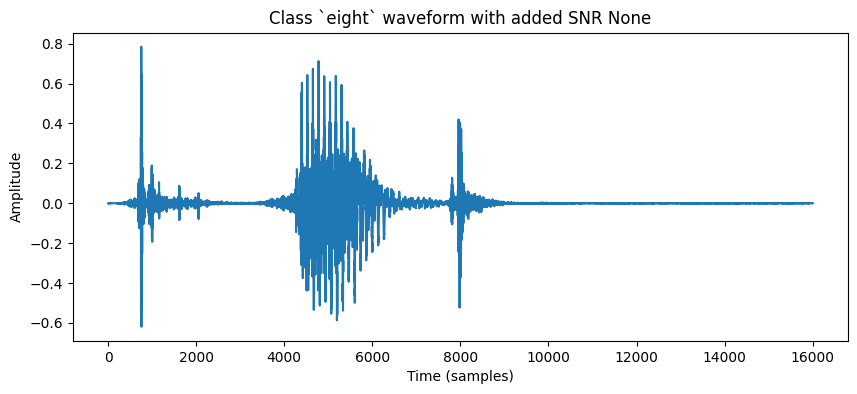

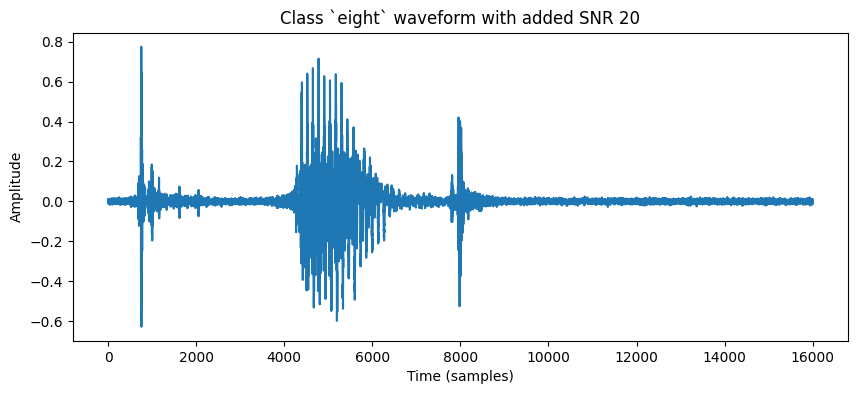

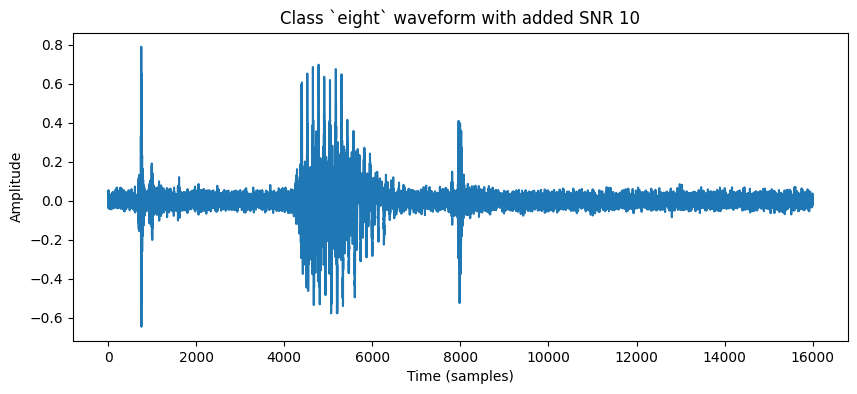

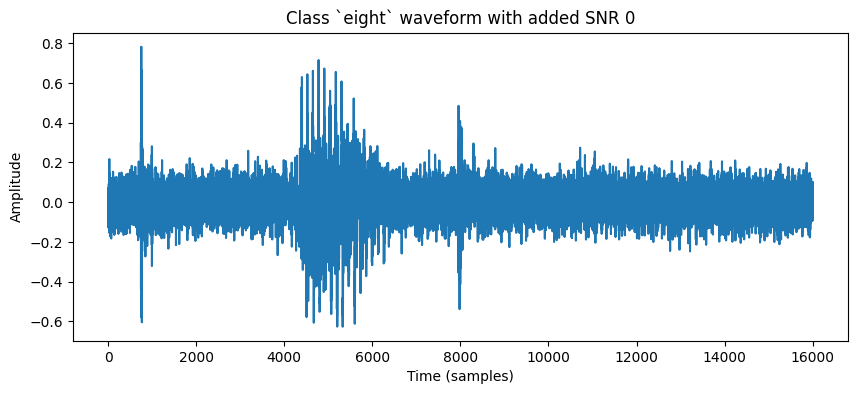

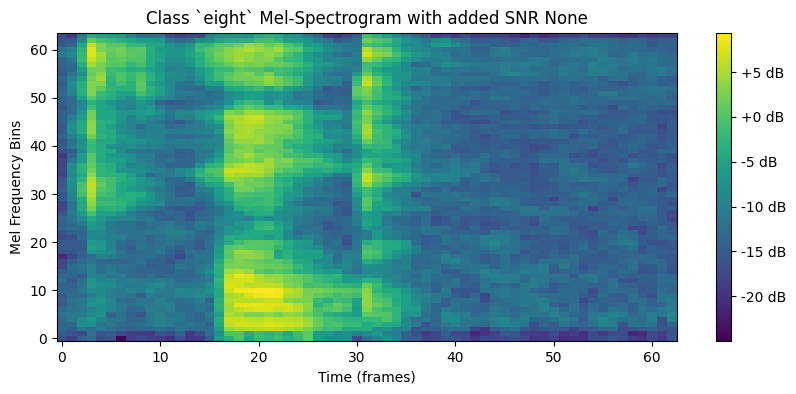

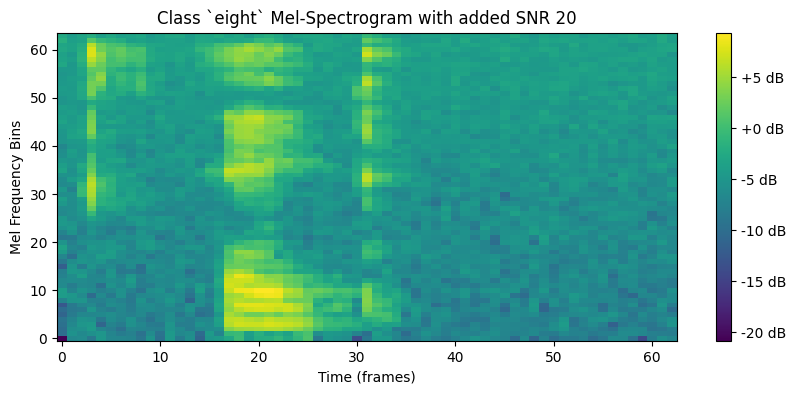

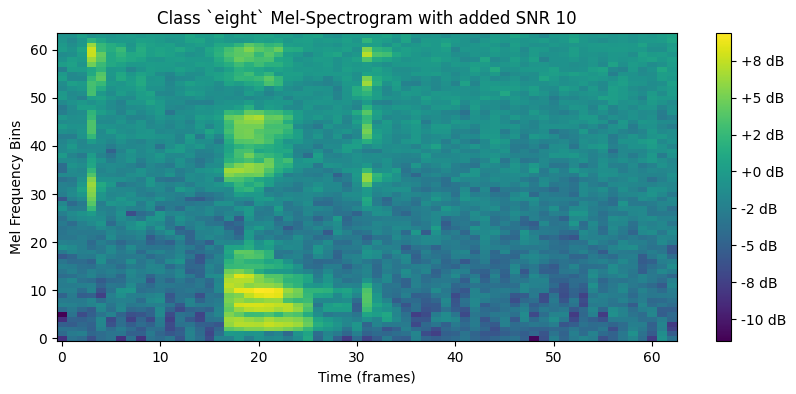

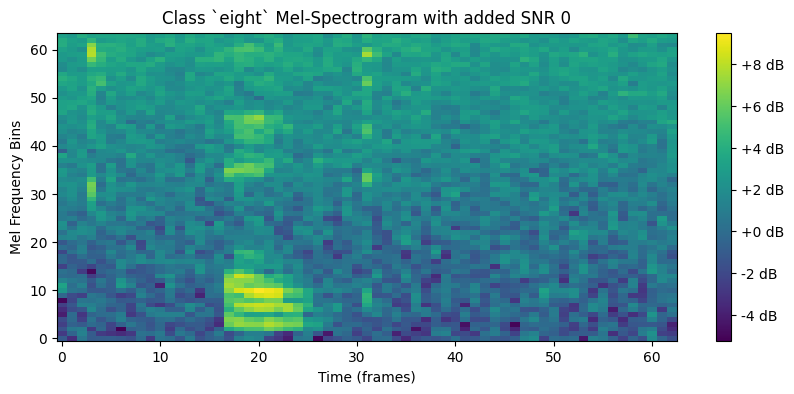

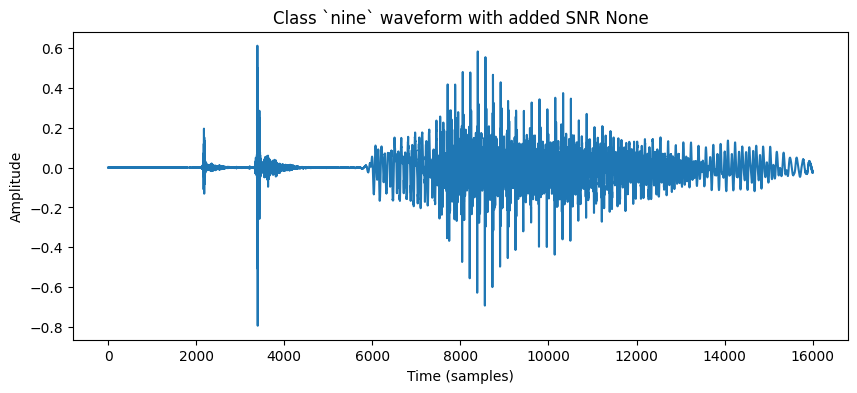

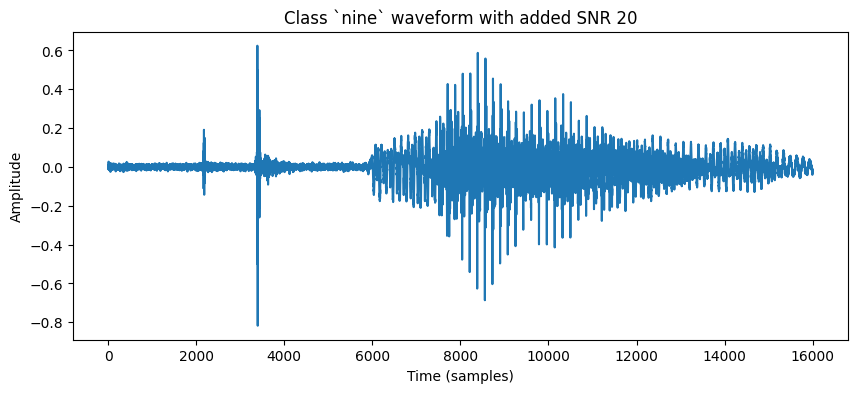

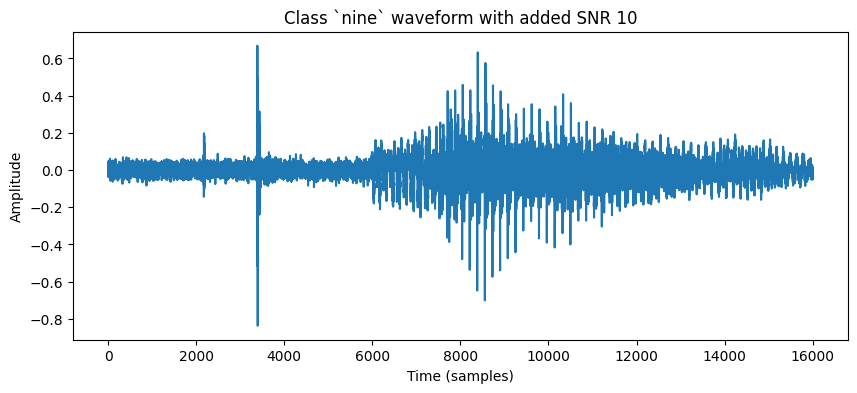

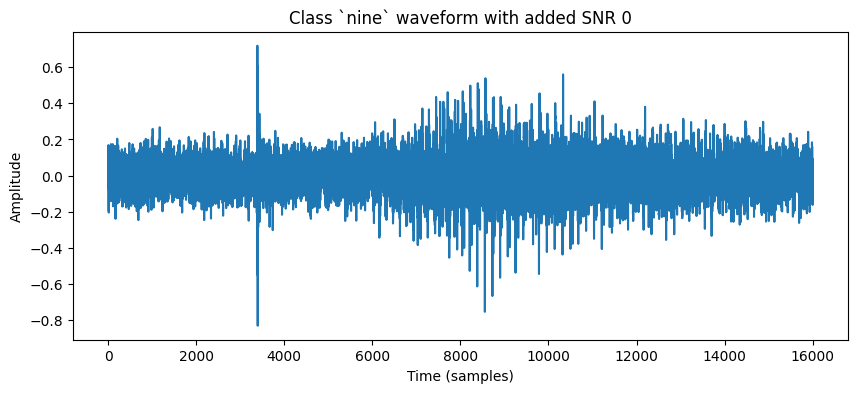

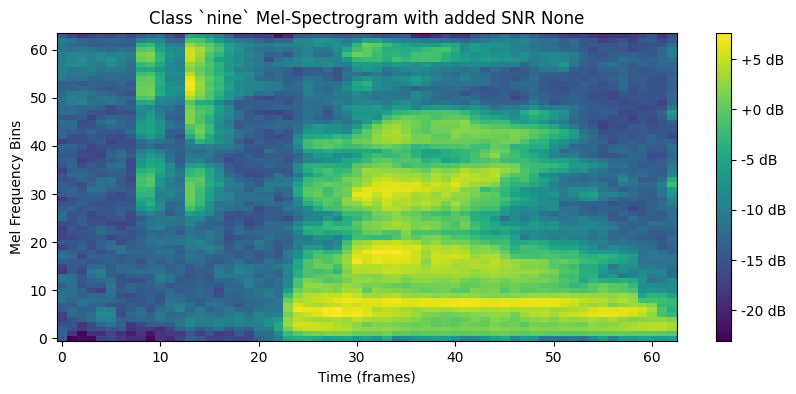

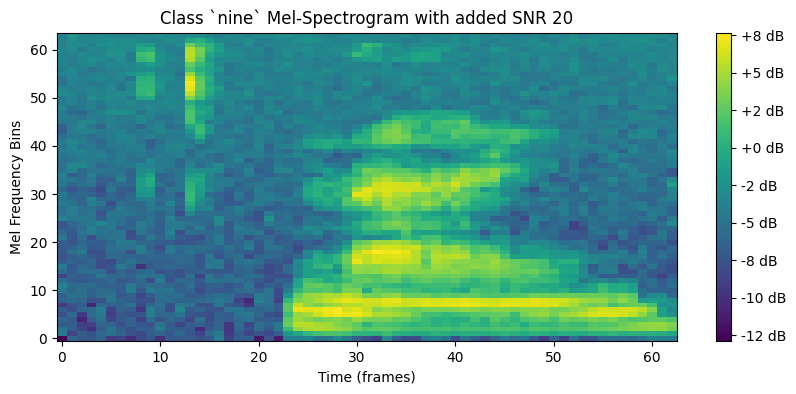

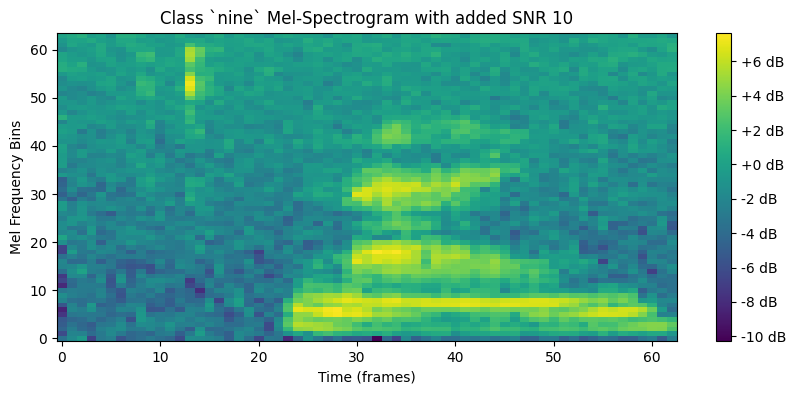

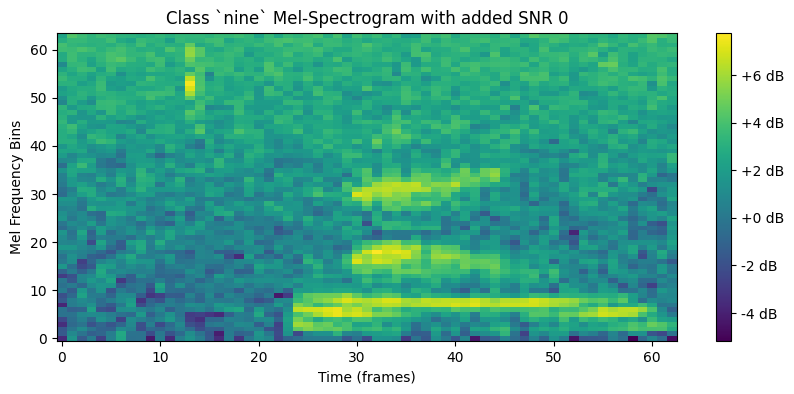

In [4]:
for label in config.classes:
    visualize_waveforms(label)
    visualize_features(label)